# 1. Problem statement - Sentiment Analysis

Need to perform Sentiment Analysis on reviews posted for Product on Amazon.Here we need to predict the Score with respect to the Review.

# 2.IMPORTING LIBRARIES AND DATASETS

In [27]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

#sckiti libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#Advanced NLP libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esvit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
data=pd.read_csv(r'Reviews (1).csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [29]:
#unique Product
len(data.ProductId.unique())

74258

In [30]:
#value count of Scores
data.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

In [31]:
data.shape

(568454, 10)

Glimpse on one Row

In [32]:

data['Summary'][2021]

'Our favorite breakfast choice'

In [33]:
data['Text'][2021]

'Bought a great waffle maker two years ago.  Tried many recipes for making waffles, nothing really pleased the family. Well, until I followed a recommendation to try Stonewall Waffles.  Believe me it is not like Bisquick as I thought it might be, it is so much better I was shocked.  And well now the family loves them and looks forward to Sunday waffles every couple weeks.  I even double up the ingredients so I can make extras which we cut into smaller sections and freeze them.  These can then be used for toster waffles and a quick breakfast.  Forget the Eggos even as frozen waffles these are great.<br /><br />What do I like best about them?  The waffles come out light and fluffy.  They are crisp and hold up well to being filled with strawberries, nuts or whatever toppings you may choose.  In no way do they feel heavy or soggy.  They are a snap to prepare, and take just 3 minutes in the waffle maker. Lastly the whole family loves them.  So despite the higher price it is well worth every

Resizing dataset so that Machine can handle

In [34]:
#Resizing data
df=data.sample(10000)


In [35]:
df.reset_index(inplace=True)

In [36]:
df=df.drop(columns=['index','Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator','Time','Summary'])

In [37]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [38]:
df

,Score,Text
0,5,Love this herbal tea! It's so delicious! It ta...
1,5,"This is it, the holy grail of dog powders to c..."
2,5,Nice sweet treat with some nutritional value. ...
3,5,The Marley coffee is the best aroma and taste....
4,1,The beans arrived good packed. Filled my Vario...
...,...,...
9995,5,These are the greatest grape licorice ever! I...
9996,5,The Stash Tea Company seems to make excellent ...
9997,5,I decided to take a chance and give this produ...
9998,3,Our family is divided into those who like Velv...


In [39]:
#df['Text'].iloc[0]

In [40]:
df.Score.value_counts()

5    6339
4    1408
1     925
3     775
2     553
Name: Score, dtype: int64

In [41]:
df

,Score,Text
0,5,Love this herbal tea! It's so delicious! It ta...
1,5,"This is it, the holy grail of dog powders to c..."
2,5,Nice sweet treat with some nutritional value. ...
3,5,The Marley coffee is the best aroma and taste....
4,1,The beans arrived good packed. Filled my Vario...
...,...,...
9995,5,These are the greatest grape licorice ever! I...
9996,5,The Stash Tea Company seems to make excellent ...
9997,5,I decided to take a chance and give this produ...
9998,3,Our family is divided into those who like Velv...


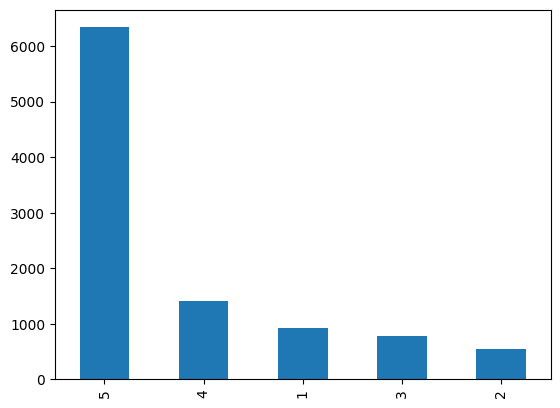

In [42]:
df.Score.value_counts().plot(kind='bar');

In [43]:
df.head(3)

,Score,Text
0,5,Love this herbal tea! It's so delicious! It ta...
1,5,"This is it, the holy grail of dog powders to c..."
2,5,Nice sweet treat with some nutritional value. ...


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Score   10000 non-null  int64 
 1   Text    10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [45]:
def conversion(Score):
    if Score==4 or Score==5:
        return 'Positive'
    elif Score==3:
        return 'Neutral'
    else:
        return 'Negative'

In [47]:
df['Sentiment'] = df['Score'].apply(conversion)
df

,Score,Text,Sentiment
0,5,Love this herbal tea! It's so delicious! It ta...,Positive
1,5,"This is it, the holy grail of dog powders to c...",Positive
2,5,Nice sweet treat with some nutritional value. ...,Positive
3,5,The Marley coffee is the best aroma and taste....,Positive
4,1,The beans arrived good packed. Filled my Vario...,Negative
...,...,...,...
9995,5,These are the greatest grape licorice ever! I...,Positive
9996,5,The Stash Tea Company seems to make excellent ...,Positive
9997,5,I decided to take a chance and give this produ...,Positive
9998,3,Our family is divided into those who like Velv...,Neutral


In [50]:
df['Sentiment'].value_counts()

Positive    7747
Negative    1478
Neutral      775
Name: Sentiment, dtype: int64

<Axes: >

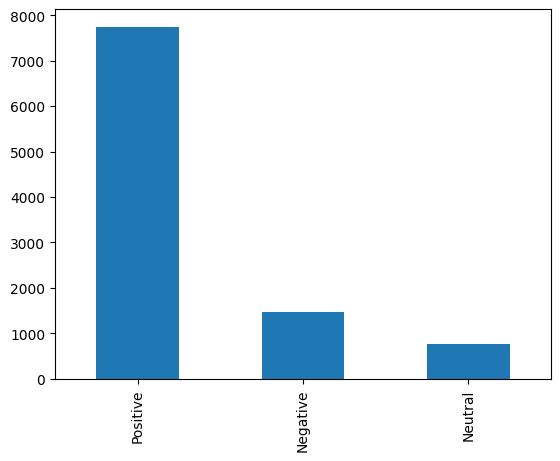

In [53]:
df['Sentiment'].value_counts().plot(kind='bar')

# 2.TEXT PREPROCESS

Text Pre-Processing is the step to clean data . Clean data is essential because we need to send vectors for important words predicting target hence words not so essential has to be cleaned.

In [54]:
df.head()

,Score,Text,Sentiment
0,5,Love this herbal tea! It's so delicious! It ta...,Positive
1,5,"This is it, the holy grail of dog powders to c...",Positive
2,5,Nice sweet treat with some nutritional value. ...,Positive
3,5,The Marley coffee is the best aroma and taste....,Positive
4,1,The beans arrived good packed. Filled my Vario...,Negative


# 2.1 Lowercase

Lowercasing is required to put all the wors in lowercase and it is useful to manage the case senstivity of a word in python.

Example - in python 'Machine' and 'machine' are different words however in english they are same

In [55]:
text='I am doing a PROJECT TOdaY'
text.lower()

'i am doing a project today'

In [56]:
#lowercase
df['Text']=df['Text'].str.lower()

In [57]:
df.head()

,Score,Text,Sentiment
0,5,love this herbal tea! it's so delicious! it ta...,Positive
1,5,"this is it, the holy grail of dog powders to c...",Positive
2,5,nice sweet treat with some nutritional value. ...,Positive
3,5,the marley coffee is the best aroma and taste....,Positive
4,1,the beans arrived good packed. filled my vario...,Negative


# 2.2 Punctuation Removal

Punctuation removal is nessecary because they do not contribute in prediction of variable

In [58]:
#punctuation removal
import string
char=string.punctuation

In [59]:
char

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
def pun_rem(text):
    for i in char:
        text=text.replace(i,'')
    return text

In [61]:
df['Text']=df['Text'].apply(pun_rem)

In [62]:
#checking some random row 
df['Text'][9187]

'my baby enjoyed this flavor when i purchased it at a store  i ordered a case of it from amazon  the whole case arrived moldy  each jar popped when i opened it too showing that it was properly sealed  i contacted earths best  they said they would look into it but would not follow up with me  given what is going on in our food industry i will not purchase any more products from this company  it is to scary when feeding a baby  amazon refunded me but did not take it any further  be very careful and inform other families too  update i was so disappointed with the lack of concern from earths best and amazon  i contacted the fda they referred me to the usda because the product contained meat  they took it very serious and had also received several complaints  they have come to my house and written a report  if anyone else noticed this problem please contact the usda 18886746854br to report your claimproblem  they will investigate the problem and the earths best plant to make sure they are f

In [63]:
#checking function on a random text
text4="Hey!!there!!, How's it going ? Have you seen +samantha ? I think she ,must{ be} out * of the $city .Right ? ?,also , let me add a stopwrods a , it, he ,she,had"
pun_rem(text4)

'Heythere Hows it going  Have you seen samantha  I think she must be out  of the city Right  also  let me add a stopwrods a  it he shehad'

## 2.3 HTML TAGS

Has to be removed because no contribution towards prediction

In [64]:
#REGEX is very much used in NLP 

import re
def removal_html(text):
    pattern = re.compile('<.*?>')#for html tags removal
    return pattern.sub(r'',text) #substituing tag with ''

In [65]:
df['Text']=df['Text'].apply(removal_html)

In [66]:
#checking on random text
text = '<b>Hello</b> <i>world!</i> <a href="https://www.example.com">Click here</a> to learn more about HTML.'
removal_html(text)

'Hello world! Click here to learn more about HTML.'

# 2.4 REMOVE URL AND WWW

In [67]:
# remove URL
def rem_url(text):
    pattern=re.compile('https?://\S+|www.\S+')
    
    return pattern.sub(r'',text)

In [68]:
df['Text']=df['Text'].apply(rem_url)

In [69]:
#checking on random string
text1 = "Check out our latest product at http://url.com/bla1/blah1/ and at  www.yahoo.com"
rem_url(text1)


'Check out our latest product at  and at  '

# 2.5 Stop word removal

In [70]:
def stp_rem(text):
    token=text.split()
    tokens=[x for x in token if x not in stopwords.words('english')]
    feat=' '.join(tokens)
    return feat

In [71]:
print(stopwords.words('english'))
#note all stopwords are in lower case

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [72]:
#checking on a random text
text2='Hi Yesterday I watched two movies Annabella and o.u.a.t.a and day before yesterday i watched Life of pie'
stp_rem(text2)

'Hi Yesterday I watched two movies Annabella o.u.a.t.a day yesterday watched Life pie'

In [73]:
df['Text']=df['Text'].apply(stp_rem)

In [74]:
df['Text'][14]

'thank udis making delicious gf bread top soy free love udis products pizza crusts bagels muffins etc closest regular found yes small thats ok great toast nice eaten without toasting fall apart even use make garlic bread rest family french bread garlic bread works well french toast love'

# 2.6 LEMMITIZATION

In [75]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\esvit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [76]:
wl=WordNetLemmatizer()

In [77]:
def lem(text):
    words=word_tokenize(text)
    lemm=[wl.lemmatize(i) for i in words]#since lemmitizer work on each word hence we need to have list of it
    return ' '.join(lemm)

In [78]:
df['Text'] = df['Text'].apply(lem)

In [79]:
df['Text']

0       love herbal tea delicious taste like oolong te...
1       holy grail dog powder convince dog workbr pour...
2       nice sweet treat nutritional value fantastic t...
3       marley coffee best aroma taste provides true c...
4       bean arrived good packed filled vario grinder ...
                              ...                        
9995    greatest grape licorice ever used eat child gr...
9996    stash tea company seems make excellent product...
9997    decided take chance give product try turned wi...
9998    family divided like velveeta cheese dont im on...
9999    hoping like fairly pricey product warm cold fo...
Name: Text, Length: 10000, dtype: object

# 4. Text Vectorisation

In [81]:
#df


In [93]:
x=df['Text']
y=df['Sentiment']

In [94]:
x

0       love herbal tea delicious taste like oolong te...
1       holy grail dog powder convince dog workbr pour...
2       nice sweet treat nutritional value fantastic t...
3       marley coffee best aroma taste provides true c...
4       bean arrived good packed filled vario grinder ...
                              ...                        
9995    greatest grape licorice ever used eat child gr...
9996    stash tea company seems make excellent product...
9997    decided take chance give product try turned wi...
9998    family divided like velveeta cheese dont im on...
9999    hoping like fairly pricey product warm cold fo...
Name: Text, Length: 10000, dtype: object

In [95]:
y

0       Positive
1       Positive
2       Positive
3       Positive
4       Negative
          ...   
9995    Positive
9996    Positive
9997    Positive
9998     Neutral
9999    Negative
Name: Sentiment, Length: 10000, dtype: object

In [97]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y

array([2, 2, 2, ..., 2, 1, 0])

HERE
* positive is 2 
* neutral is 1 
* Negative is 0

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_test.shape

((8000,), (2000,))

In [101]:
y_test.shape

(2000,)

# 4.1 BOW

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,1))

In [103]:
x_train_bow=cv.fit_transform(x_train)
x_test_bow=cv.transform(x_test)
x_train_bow

<8000x21609 sparse matrix of type '<class 'numpy.int64'>'
	with 273675 stored elements in Compressed Sparse Row format>

In [104]:
x_train_bow.shape

(8000, 21609)

trying to find the documents and its vector

In [105]:
lis=list(cv.vocabulary_.items())
lis
for i in lis:
    if i[1]==7391:
        print(i)
        break

('fading', 7391)


Found that order of x_train_bow is different from x_train

# 4.2 N-GRAM

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
bigm=CountVectorizer(ngram_range=(2,2))

In [107]:
x_train_bgm = bigm.fit_transform(x_train)
x_test_bgm=bigm.transform(x_test)
x_train_bgm.shape

(8000, 209292)

In [108]:
len(bigm.vocabulary_)

209292

In [109]:
#bigm.vocabulary_

# 4.3  Tri gram

In [110]:
trgm=CountVectorizer(ngram_range=(3,3))
x_train_trgm = trgm.fit_transform(x_train)
x_test_trgm=trgm.transform(x_test)

In [111]:
x_train_trgm.shape

(8000, 293820)

# 4.4 TF-IDF

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [113]:
x_train_tf = tf.fit_transform(x_train)
x_test_tf =tf.transform(x_test)
x_train_tf.shape


(8000, 21609)

In [114]:
#tf.vocabulary_

# 5 . Modeling

# ********* BASE MODELS***************

# 5.1  Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression


In [125]:
lg=LogisticRegression(multi_class='multinomial',class_weight='balanced')

In [126]:
model_bow = lg.fit(x_train_bow,y_train)
predict_bow=model_bow.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.804

In [127]:
model_bgm = lg.fit(x_train_bgm,y_train)
predict_bgm=model_bgm.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.7885

In [128]:
model_tgm=lg.fit(x_train_trgm,y_train)
predict_tgm=model_tgm.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.779

In [129]:
model_tf=lg.fit(x_train_tf,y_train)
predict_tf=model_tf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.7865

In [131]:
print(np.mean(cross_val_score(lg,x_train_bow,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(lg,x_train_bgm,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(lg,x_train_trgm,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(lg,x_train_tf,y_train,cv=5,scoring='accuracy')))

0.788375
0.79425
0.78225
0.77875


In [132]:
#confusion matrix for BGM since it is showing the highest accuracy in LGR model
confusion_matrix(y_test,predict_bow)

array([[ 191,   50,   80],
       [  42,   50,   46],
       [  94,   80, 1367]], dtype=int64)

In [134]:
print(classification_report(y_test,predict_bow))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       321
           1       0.28      0.36      0.31       138
           2       0.92      0.89      0.90      1541

    accuracy                           0.80      2000
   macro avg       0.59      0.61      0.60      2000
weighted avg       0.82      0.80      0.81      2000



# 5 .2MNB

In [135]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

In [136]:
model_bow = mnb.fit(x_train_bow,y_train)
predict_bow= model_bow.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.808

In [139]:
model_bgm = mnb.fit(x_train_bgm,y_train)
predict_bgm= model_bgm.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.7975

In [140]:
model_tgm = mnb.fit(x_train_trgm,y_train)
predict_tgm= model_tgm.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.7795

In [141]:
model_tf = mnb.fit(x_train_tf,y_train)
predict_tf= model_tf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.7705

In [142]:
print(np.mean(cross_val_score(mnb,x_train_bow,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(mnb,x_train_bgm,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(mnb,x_train_trgm,y_train,cv=5,scoring='accuracy')))
print(np.mean(cross_val_score(mnb,x_train_tf,y_train,cv=5,scoring='accuracy')))

0.801375
0.558
0.14537499999999998
0.77575


In [144]:
#predict_tf

confusion_matrix(y_test,predict_bow)
#predicted ---
#actual| 

array([[  96,    1,  224],
       [   6,    0,  132],
       [  21,    0, 1520]], dtype=int64)

In [146]:
print(classification_report(y_test,predict_bow))

              precision    recall  f1-score   support

           0       0.78      0.30      0.43       321
           1       0.00      0.00      0.00       138
           2       0.81      0.99      0.89      1541

    accuracy                           0.81      2000
   macro avg       0.53      0.43      0.44      2000
weighted avg       0.75      0.81      0.75      2000



# 5.3 SVC

In [147]:
from sklearn.svm import SVC
svc=SVC()

In [148]:
model_bow=svc.fit(x_train_bow,y_train)
predict_bow=svc.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.8035

In [149]:
model_bgm=svc.fit(x_train_bgm,y_train)
predict_bgm=svc.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.7745

In [150]:
model_tgm=svc.fit(x_train_trgm,y_train)
predict_tgm=svc.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.7745

In [151]:
model_tf=svc.fit(x_train_tf,y_train)
predict_tf=svc.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.807

In [152]:
confusion_matrix(predict_tf,y_test)

array([[  77,    6,    5],
       [   0,    1,    0],
       [ 244,  131, 1536]], dtype=int64)

In [153]:
print(classification_report(predict_tf,y_test))

              precision    recall  f1-score   support

           0       0.24      0.88      0.38        88
           1       0.01      1.00      0.01         1
           2       1.00      0.80      0.89      1911

    accuracy                           0.81      2000
   macro avg       0.41      0.89      0.43      2000
weighted avg       0.96      0.81      0.87      2000



In [154]:
np.mean(cross_val_score(svc,x_train_tf,y_train,cv=10,scoring='accuracy'))

0.8036249999999999

In [155]:
np.mean(cross_val_score(svc,x_train_bow,y_train,cv=10,scoring='accuracy'))

0.795625

# Linear SVC


In [156]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC()


In [157]:
model_bow=lsvc.fit(x_train_bow,y_train)
predict_bow=lsvc.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.8125

In [158]:
model_bgm=lsvc.fit(x_train_bgm,y_train)
predict_bgm=lsvc.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.7865

In [159]:
model_tgm=lsvc.fit(x_train_trgm,y_train)
predict_tgm=lsvc.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.7795

In [160]:
model_tf=lsvc.fit(x_train_tf,y_train)
predict_tf=lsvc.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.8425

In [161]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       321
           1       0.49      0.14      0.21       138
           2       0.87      0.97      0.92      1541

    accuracy                           0.84      2000
   macro avg       0.69      0.55      0.58      2000
weighted avg       0.82      0.84      0.82      2000



In [162]:
confusion_matrix(predict_tf,y_test)

array([[ 176,   31,   42],
       [  11,   19,    9],
       [ 134,   88, 1490]], dtype=int64)

In [163]:
np.mean(cross_val_score(lsvc,x_train_tf,y_train,cv=5,scoring='accuracy'))

0.8305

# SGD

In [170]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()


In [171]:
model_bow=sgd.fit(x_train_bow,y_train)
predict_bow=sgd.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.8085

In [172]:
model_bgm=sgd.fit(x_train_bgm,y_train)
predict_bgm=sgd.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.7885

In [173]:
model_tgm=sgd.fit(x_train_trgm,y_train)
predict_tgm=sgd.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.7815

In [174]:
model_tf=sgd.fit(x_train_tf,y_train)
predict_tf=sgd.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.8405

In [175]:
np.mean(cross_val_score(sgd,x_train_tf,y_train,cv=5,scoring='accuracy'))

0.830875

In [176]:
confusion_matrix(y_test,predict_tf)

array([[ 170,    3,  148],
       [  31,   10,   97],
       [  35,    5, 1501]], dtype=int64)

In [179]:
print(classification_report(y_test,predict_tf
                           ))

              precision    recall  f1-score   support

           0       0.72      0.53      0.61       321
           1       0.56      0.07      0.13       138
           2       0.86      0.97      0.91      1541

    accuracy                           0.84      2000
   macro avg       0.71      0.53      0.55      2000
weighted avg       0.82      0.84      0.81      2000



Among all the baseline models SGD gives the best performance of approx 67-68% accuracy

# HYPERPARAMETER TUNING OF BASE MODEL

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [180]:
from sklearn.model_selection import RandomizedSearchCV

In [181]:
estimator =sgd
parameters={'loss':['hinge','log_loss','modified_huber','squared_hinge','epsilon_insensitive','perceptron'],
           'penalty':['l1','elasticnet'],
           'class_weight':['weight','balanced']}

In [182]:
rd=RandomizedSearchCV(estimator=estimator,param_distributions=parameters)
clf=rd.fit(x_train_tf,y_train)

In [183]:
clf.best_estimator_

SGDClassifier(class_weight='balanced', penalty='elasticnet')

In [184]:
clf.best_params_

{'penalty': 'elasticnet', 'loss': 'hinge', 'class_weight': 'balanced'}

In [185]:
clf.best_score_

0.8153749999999998

# ENSEMBLE TECHNIQUES

# VOTING CLASSIFIER

In [189]:
estimators=[('lg',lg),('rf',rf),('mnb',mnb),('lsvc',lsvc),('svc',svc),('sgd',sgd)]

In [190]:
#estimators[0][0]

In [191]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=estimators,voting='hard')


In [192]:
model_tf=vc.fit(x_train_tf,y_train)
predict_tf=vc.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.837

In [193]:
model_bow=vc.fit(x_train_bow,y_train)
predict_bow=vc.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.831

In [194]:
model_bgm=vc.fit(x_train_bgm,y_train)
predict_bgm=vc.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.789

In [195]:
model_tgm=vc.fit(x_train_trgm,y_train)
predict_tgm=vc.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.782

In [196]:
confusion_matrix(y_test,predict_tf)

array([[ 157,    3,  161],
       [  25,   10,  103],
       [  29,    5, 1507]], dtype=int64)

In [197]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           0       0.74      0.49      0.59       321
           1       0.56      0.07      0.13       138
           2       0.85      0.98      0.91      1541

    accuracy                           0.84      2000
   macro avg       0.72      0.51      0.54      2000
weighted avg       0.81      0.84      0.80      2000



In [212]:
x=cross_val_score(vc,x_train_tf,y_train,cv=10,scoring='accuracy')
print(np.mean(x))

0.8316250000000001


# BAGGING

# RANDOM FOREST

In [199]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [200]:
model_bow=rf.fit(x_train_bow,y_train)
predict_bow = rf.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.792

In [201]:
model_bgm=rf.fit(x_train_bgm,y_train)
predict_bgm = rf.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.7885

In [202]:
model_tgm=rf.fit(x_train_trgm,y_train)
predict_tgm = rf.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.782

In [203]:
model_tf=rf.fit(x_train_tf,y_train)
predict_tf = rf.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.791

In [204]:
confusion_matrix(y_test,predict_bow)

array([[  44,    0,  277],
       [   0,    3,  135],
       [   3,    1, 1537]], dtype=int64)

In [205]:
print(classification_report(y_test,predict_bow))

              precision    recall  f1-score   support

           0       0.94      0.14      0.24       321
           1       0.75      0.02      0.04       138
           2       0.79      1.00      0.88      1541

    accuracy                           0.79      2000
   macro avg       0.82      0.39      0.39      2000
weighted avg       0.81      0.79      0.72      2000



# BAGGIGNG CLASFIFERS

In [206]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(base_estimator=sgd,
                    n_estimators=50,
                    max_samples=0.3,
                    random_state=0)

In [207]:
model_bow=bg.fit(x_train_bow,y_train)
predict_bow = bg.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.8235

In [208]:
model_bgm=bg.fit(x_train_bgm,y_train)
predict_bgm = bg.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.772

In [209]:
model_tgm=bg.fit(x_train_trgm,y_train)
predict_tgm = bg.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.7715

In [210]:
model_tf = bg.fit(x_train_tf,y_train)
predict_tf = bg.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.8155

In [213]:
confusion_matrix(y_test,predict_tf)

array([[  93,    0,  228],
       [  15,    2,  121],
       [   5,    0, 1536]], dtype=int64)

In [215]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           0       0.82      0.29      0.43       321
           1       1.00      0.01      0.03       138
           2       0.81      1.00      0.90      1541

    accuracy                           0.82      2000
   macro avg       0.88      0.43      0.45      2000
weighted avg       0.83      0.82      0.76      2000



# BOOSTING

# Gradient Boost

In [216]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()


In [217]:
model_bow=gb.fit(x_train_bow,y_train)
predict_bow = gb.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.7925

In [218]:
model_bgm=gb.fit(x_train_bgm,y_train)
predict_bgm = gb.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.781

In [219]:
model_tgm=gb.fit(x_train_trgm,y_train)
predict_tgm = gb.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.7725

In [221]:
model_tf = gb.fit(x_train_tf,y_train)
predict_tf = gb.predict(x_test_tf)
accuracy_score(y_test,predict_tf)


0.799

In [222]:
confusion_matrix(y_test,predict_tf)

array([[  64,    7,  250],
       [  11,    3,  124],
       [   6,    4, 1531]], dtype=int64)

In [235]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           0       0.63      0.31      0.42       321
           1       0.30      0.09      0.14       138
           2       0.82      0.96      0.89      1541

    accuracy                           0.80      2000
   macro avg       0.58      0.46      0.48      2000
weighted avg       0.76      0.80      0.76      2000



# XGBOOST

In [224]:
import xgboost

In [280]:
from xgboost import XGBClassifier
Xgb=XGBClassifier(objective='gblinear')


In [281]:
model_bow=Xgb.fit(x_train_bow,y_train)
predict_bow = Xgb.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.82

In [282]:
model_bgm=Xgb.fit(x_train_bgm,y_train)
predict_bgm = Xgb.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.7865

In [283]:
model_tgm=Xgb.fit(x_train_trgm,y_train)
predict_tgm = Xgb.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.7735

In [284]:
model_xgb=Xgb.fit(x_train_tf,y_train)
predict_xgb=Xgb.predict(x_test_tf)
accuracy_score(y_test,predict_xgb)

0.824

# ADABOOST

In [226]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()


In [227]:
model_bow=adb.fit(x_train_bow,y_train)
predict_bow = adb.predict(x_test_bow)
accuracy_score(y_test,predict_bow)

0.802

In [228]:
model_bgm=adb.fit(x_train_bgm,y_train)
predict_bgm = adb.predict(x_test_bgm)
accuracy_score(y_test,predict_bgm)

0.7775

In [229]:
model_tgm=adb.fit(x_train_trgm,y_train)
predict_tgm = adb.predict(x_test_trgm)
accuracy_score(y_test,predict_tgm)

0.7735

In [231]:
model_tf = adb.fit(x_train_tf,y_train)
predict_tf = adb.predict(x_test_tf)
accuracy_score(y_test,predict_tf)

0.7965

In [233]:
confusion_matrix(y_test,predict_tf)

array([[ 100,   13,  208],
       [  16,   13,  109],
       [  43,   18, 1480]], dtype=int64)

In [234]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

           0       0.63      0.31      0.42       321
           1       0.30      0.09      0.14       138
           2       0.82      0.96      0.89      1541

    accuracy                           0.80      2000
   macro avg       0.58      0.46      0.48      2000
weighted avg       0.76      0.80      0.76      2000



# LIGHT GBM

In [ ]:
#conversion of x_train into suitable format for LIGHTGBM

In [277]:
#type(x_train_bow)

scipy.sparse._csr.csr_matrix

In [265]:
x_train_bow_l = x_train_bow.astype(np.float32)
x_test_bow_l = x_test_bow.astype(np.float32)

x_train_bgm_l = x_train_bgm.astype(np.float32)
x_test_bgm_l = x_test_bgm.astype(np.float32)


x_train_tgm_l = x_train_trgm.astype(np.float32)
x_test_tgm_l = x_test_trgm.astype(np.float32)


x_train_tf_l = x_train_tf.astype(np.float32)
x_test_tf_l = x_test_tf.astype(np.float32)





In [266]:
import lightgbm 
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()

In [267]:
model_bow=lgb.fit(x_train_bow_l,y_train)
predict_bow = lgb.predict(x_test_bow_l)
accuracy_score(y_test,predict_bow)

0.832

In [269]:
model_bgm=lgb.fit(x_train_bgm_l,y_train)
predict_bgm = lgb.predict(x_test_bgm_l)
accuracy_score(y_test,predict_bgm)

0.778

In [270]:
model_tgm=lgb.fit(x_train_tgm_l,y_train)
predict_tgm = lgb.predict(x_test_tgm_l)
accuracy_score(y_test,predict_tgm)

0.7705

In [272]:
model_tf = lgb.fit(x_train_tf_l,y_train)
predict_tf = lgb.predict(x_test_tf_l)
accuracy_score(y_test,predict_tf)

0.827

In [273]:
np.mean(cross_val_score(lgb,x_train_tf_l,y_train,cv=5,scoring='accuracy'))

0.820375

In [274]:
confusion_matrix(y_test,predict_tf)

array([[ 141,   13,  167],
       [  25,   15,   98],
       [  32,   11, 1498]], dtype=int64)

In [275]:
print(classification_report(y_test,predict_tf))

              precision    recall  f1-score   support

         0.0       0.71      0.44      0.54       321
         1.0       0.38      0.11      0.17       138
         2.0       0.85      0.97      0.91      1541

    accuracy                           0.83      2000
   macro avg       0.65      0.51      0.54      2000
weighted avg       0.80      0.83      0.80      2000



# BEST MODEL 

* LINEAR SVC WITH 84.25% ACCURACY
* SGD WITH 84.05% ACCURACY

# NOTES

* Originl datasets is having more than 5.5 lakhs rows due to the shortcoming of local system it has been downsized
* It has been observed that more the data more the accuracy for sentiment prediction
* SVC algo took so much of time dealing with the traing
* XGBOOST require labelling str from 0 hence not done but done in another notebook where positive is marked as 1 and negative as 0
* This is the traditional way of dealing with sentiment analysis better modelling is done by fine tuning a pre-trained transformer model like BERT,ROBERTA etc


# ACCURACY

Accuracy can be gauged on different parameters but the first intiation would be of accuracy
* Confusion matrix can be checked.Diagonal elements in the matrix can provide picture of accuractely predicting different classes.
* F1 ,weighted F1 score can be treated since we have an imbalanced class.